# Supervised Learning - Classification

In [2]:
%pip install pandas
%pip install StandardScaler            
%pip install matplotlib 
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import CSV File

In [3]:
# 1. Dataset laden
import pandas as pd
data = pd.read_csv('data/diabetes.csv')

## Fit a Generalized Linear Model (Logistic Regression)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Zielvariable kodieren
le = LabelEncoder()
data['target'] = le.fit_transform(data['class'])  # [3][4]

# Features und Zielvariable definieren
X = data.drop(['class', 'target'], axis=1)
y = data['target']

# Modell initialisieren und trainieren
model = LogisticRegression(solver='liblinear', max_iter=1000)  # [4][5]
model.fit(X, y)

LogisticRegression(max_iter=1000, solver='liblinear')

## Evaluate the model

Koeffizienten: [[ 1.17061865e-01  2.83893855e-02 -1.68880903e-02  7.55635388e-04
  -6.42919999e-04  5.97757973e-02  6.77489484e-01  7.24167534e-03]]
Intercept: [-5.89249766]
Genauigkeit: 77.47%


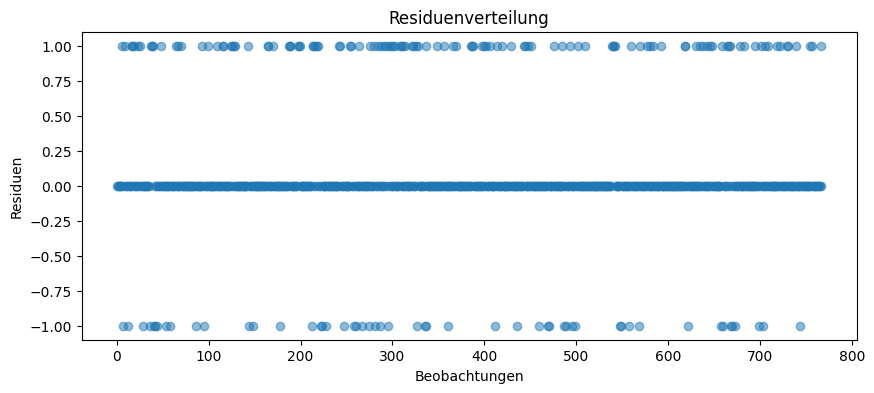

In [5]:
print("Koeffizienten:", model.coef_)
print("Intercept:", model.intercept_)

from sklearn.metrics import accuracy_score
predictions = model.predict(X)
print(f"Genauigkeit: {accuracy_score(y, predictions):.2%}")  # [4][6]

# Residuenvisualisierung
import matplotlib.pyplot as plt
residuals = y - predictions
plt.figure(figsize=(10,4))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.title('Residuenverteilung')
plt.xlabel('Beobachtungen')
plt.ylabel('Residuen')
plt.show()

## Train the model using cross-validation

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)  # [4][5]

model_cv = LogisticRegression(solver='liblinear', max_iter=1000)
model_cv.fit(X_train, y_train)

test_predictions = model_cv.predict(X_test)
print(f"Test-Genauigkeit: {accuracy_score(y_test, test_predictions):.2%}")

Test-Genauigkeit: 75.97%
